# Binary cross-entropy loss function

The binary cross-entropy function, which will be used throughout the analysis, is defined as follows:

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$
where $\sigma(z) = \frac{1}{1+e^{-z}}$ is called a *sigmoid* function.

We will usually treat this function as a function of $z$ having $y$ as parameter:
$$
L(y, z) = g_y(z)
$$

We start off by calculating derivative of $g$:
$$
g_y'(z) = \frac{\partial}{\partial z}{L(y, z)} = -y\frac{\sigma'(z)}{\sigma(z)} - (1-y)\frac{-\sigma'(z)}{1-\sigma(z)} = -y\frac{\sigma'(z)}{\sigma(z)} + (1-y)\frac{\sigma'(z)}{1-\sigma(z)}
$$
We have:
$$\frac{\sigma'(z)}{\sigma(z)} = \frac{-\frac{-e^{-z}}{(1+e^{-z})^2}}{\frac{1}{1+e^{-z}}} = \frac{e^{-z}}{1+e^{-z}} = \frac{1}{1+e^z} = \sigma(-z)
$$
and also:
$$\frac{\sigma'(z)}{1-\sigma(z)} = \frac{-\frac{-e^{-z}}{(1+e^{-z})^2}}{1-\frac{1}{1+e^{-z}}} = \frac{\frac{e^{-z}}{(1+e^{-z})^2}}{\frac{e^{-z}}{1+e^{-z}}} = \frac{1}{1+e^{-z}} = \sigma(z)$$
Therefore we obtain the following result:
$$
g_y'(z) = \frac{\partial}{\partial z}{L(y, z)} = -y\frac{\sigma'(z)}{\sigma(z)} - (1-y)\frac{-\sigma'(z)}{1-\sigma(z)} = -y\sigma(-z) + (1-y)\sigma(z) = \sigma(z) - y(\sigma(z) + \sigma(-z))
$$

In [ ]:
import numpy as np
from scipy.optimize import newton

def sigma(z: np.ndarray) -> np.ndarray:
    return 1.0/(1.0 + np.exp(-z))

def L(z: np.ndarray, y: np.ndarray) -> np.ndarray:
    return -y * np.log(sigma(z)) - (1.0 - y) * np.log(1.0 - sigma(z))

In [3]:
np.random.seed(0)

n = 1000 # number of 0-1 labels
y = np.random.binomial(1, 0.1, n)
m = np.sum(y)
k = n - m
print(f'Number of "1": {m}, number of "0": {k}, total number of labels: {m+k}.')
f = np.random.normal(0, 1, n)

Number of "1": 108, number of "0": 892, total number of labels: 1000.


# Scenario A

In Scenario A our aim is to find:
$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$
Keeping in mind that $\sum_{i=1}^{n}{y_i} = m$, we can write:
$$
\frac{\partial}{\partial \lambda}\sum_{i=1}^{n} L(y_i, \lambda) = \sum_{i=1}^{n}{g_{y_i}'(\lambda)} = \sum_{i=1}^{n}{\left(\sigma(\lambda) - y_i(\sigma(\lambda) + \sigma(-\lambda))\right)} = n\sigma(\lambda) + m(\sigma(\lambda) + \sigma(-\lambda)) = k\sigma(\lambda) - m\sigma(-\lambda)
$$
We therefore have to find $\lambda^*$ such that:
$$k\sigma(\lambda^*) - m\sigma(-\lambda^*) = 0$$
$$k\sigma(\lambda^*) = m\sigma(-\lambda^*)$$
$$\frac{\sigma(\lambda^*)}{\sigma(-\lambda^*)} = \frac{m}{k}$$
$$\frac{\frac{1}{1 + e^{-\lambda^*}}}{\frac{1}{1 + e^{\lambda^*}}} = \frac{m}{k}$$
$$\frac{1 + e^{\lambda^*}}{1 + e^{-\lambda^*}} = \frac{m}{k}$$
$$\frac{e^{\lambda^*} + e^{2\lambda^*}}{1 + e^{\lambda^*}} = \frac{m}{k}$$
Setting $u = e^{\lambda^*}$, we obtain a quadratic equation:
$$u^2 + u\left(1-\frac{m}{k}\right) - \frac{m}{k} = 0$$
Which always has one root $u=-1$ (not allowed because of the substitution), but typically has two roots (provided that $\Delta > 0$). The second root is:
$$u^* = \frac{-\left(1-\frac{m}{k}\right) + \sqrt{\left(1-\frac{m}{k}\right)^2 + 4\frac{m}{k}}}{2} = \frac{-\left(1-\frac{m}{k}\right) + \sqrt{\left(1+\frac{m}{k}\right)^2}}{2} = \frac{-1 + \frac{m}{k} + 1 + \frac{m}{k}}{2} = \frac{m}{k}$$
Therefore we can write:
$$\lambda^* = \ln{\left(\frac{m}{k}\right)}$$
And this is the value that minimises binary cross-entropy loss in Scenario A. We can see that this is just the logarithm of ratio of "1" labels to "0" labels.

To make sure that the above calculations are correct, we calculate the optimal $\lambda$ in three different ways. First, we use the equation which uses *sigmoid* function along with Newton's method for root finding:

In [ ]:
newton(lambda x: k*sigma(x) - m*sigma(-x), x0 = 0.0) # -2.1113349054557897

-2.1113349054557897

For the second method, we define the quadratic function derived above, calculate it's root and then take the logarithm:

In [ ]:
def quadratic_variant(x, m, k):
    return x**2 + (1 - m/k)*x - m/k

np.log(newton(lambda x: quadratic_variant(x, m, k), x0 = 0.0)) # -2.1113349054557897

-2.1113349054557897

Finally, we define explicitly the roots of the obtained quadratic function, compute them and take logarithm if the second one is positive:

In [ ]:
def roots(m, k):    
    return -1.0, m/k

np.log(roots(m, k)[1]) # -2.1113349054557897

-2.1113349054557897

As we can see, the results are the same in all three cases. We can now plot the loss
$$\sum_{i=1}^{n} L(y_i, \lambda)$$
as a function of $\lambda$:

<AxesSubplot: >

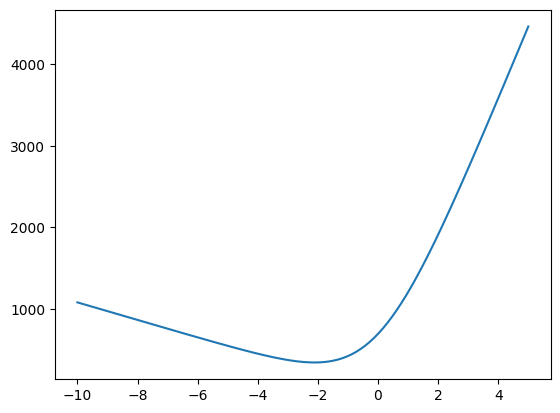

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

lambdas = np.linspace(-10, 5, 200)
ser_plot = pd.Series()
for l in lambdas:
    ser_plot.loc[l] = np.sum(L(l, y))
    
ser_plot.plot()

We can see a nicely shaped, convex function - easy to minimize.

# Scenario B

Now we want to compute:
$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$
where $f_i = f(x_i)$ are predictions from the previous step. We can try to compute the optimal $\lambda$ in the same manner as before:
$$\frac{\partial}{\partial \lambda}\sum_{i=1}^{n} L(y_i, f_i + \lambda) = \sum_{i=1}^{n}{g_{y_i}'(f_i + \lambda)} = \sum_{i=1}^{n}{\left(\sigma(f_i + \lambda) - y_i(\sigma(f_i + \lambda) + \sigma(-f_i - \lambda))\right)} = 0$$
And this implicit equation cannot be solved in general because the sigmoid function is non-linear, non-additive and $f_i$ are unknown. We can plot the loss landscape:

<AxesSubplot: >

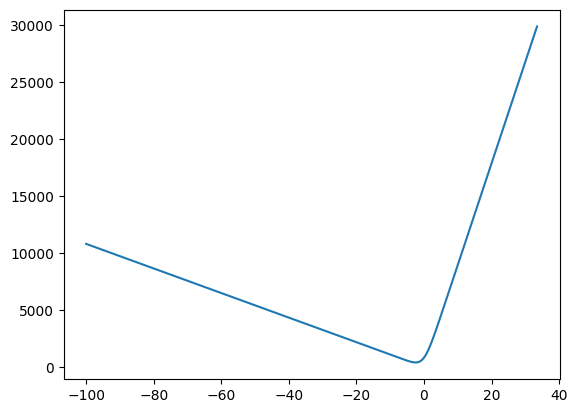

In [64]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

lambdas = np.linspace(-100, 100, 2000)
ser_plot = pd.Series()
for l in lambdas:
    ser_plot.loc[l] = np.sum(L(f + l, y))
    
ser_plot.plot()

We can again see a nice, convex function - which is very strange and perhaps means that we've made a mistake somewhere. Our intuition here would be that loss landscape is nonlinear, complex and therefore the roots are hard to find.

On the other hand, the irreducible complexity of the derivative equation for finding the optimal $\lambda$ might indeed be the only problem here - it's possible that finding root of such an equation is hard even though the loss landscape is fairly simple.